In [1]:
#get useful libraries
import os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np
from statistics import *

import pylab as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)


import urllib  #weird, guess need to have os and pandas imported for this to work                                                  
                                                                          
import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      

#! pip install geocoder #]later maybe
! pip install geopandas #this is how you install packages on colab
import geopandas as gpd                                                                                       
#from geopy.geocoders import Nominatim #later maybe

import seaborn as sns

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.4 MB/s eta 0:00:00


In [5]:
# basic navigation
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'njline.csv', 'sample_data']

In [9]:
njline=pd.read_csv("njline.csv")

The dataset is comprised of election results from New Jersey's 2021 legislative primaries, containing information on endorsements and other variables. It is separated by county; if a district covers three counties, there will be three observations for each candidate in the race and three distinct county results.

In [10]:
njline.columns

Index(['Year', 'Candidate', 'Party', 'LD', 'Level', 'Gender', 'Incumbent',
       'County', 'Endorsement', 'Votes.Received', 'Nearest.Comp',
       'Total.County.Votes', 'Margin.of.Victory.County', 'Eleven.Day.COH',
       'Treatment'],
      dtype='object')

Year is election year, candidate is candidate name, party is party, LD is legislative district, level is senate or assembly, gender is gender, incumbent is sitting legislator or challenger, endorsement is party endorsed or challenger. The next four comprise the math to create the margin of victory in each county for the legislative districts. Eleven day cash on hand is the last campaign finance filing of cash on hand. Treatment marks two districts of note for further analysis.

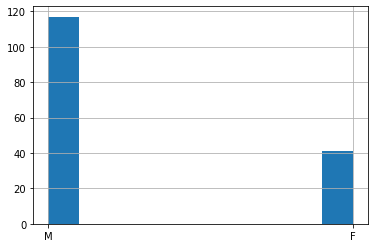

In [13]:
njline['Gender'].hist()

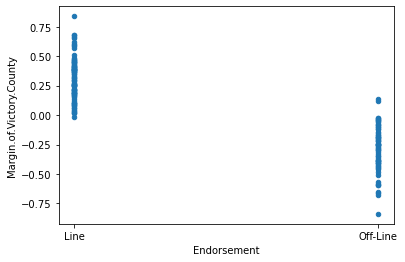

In [15]:
njline.plot(kind='scatter', y='Margin.of.Victory.County', x='Endorsement')

Gender is a binary variable, while endorsement is a marker of receiving the party's endorsement in the primary. This is colloquially referred to as "the line" in NJ politics.

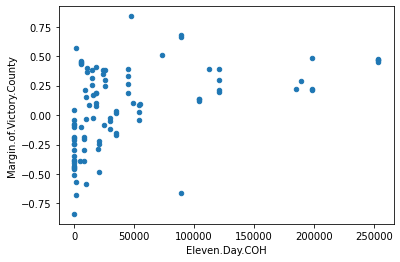

In [16]:
njline.plot(kind='scatter', y='Margin.of.Victory.County', x='Eleven.Day.COH')

Eleven.Day.COH is the last campaign finance report of cash on hand. Margin.of.Victory.County is the margin of victory in each county that the district represents.

Overall, this data represents election results. Due to the nature of separating out by county, it has around 100 observations for a smaller number of actual elections. I intend to look at margin of victory in regards to endorsement by the party. The other variables collected may prove interesting, or not. There has been scholarship on the matter that suggests the endorsement is worth a great deal in election results, and this dataset can provide further answers in a more complx manner than those previous analyses.